In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def plot_cwts(instances, images_per_row=10, **options):
    size = 100
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
    
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


from scipy import signal
from itertools import zip_longest

def grouper(iterable, n, fillvalue=None):
    args = [iter(iterable)] * n
    return zip_longest(*args, fillvalue=fillvalue)

In [73]:
eyes_closed_time_data = pd.read_csv("C:\\Users\\mmang\\source\\repos\\MindGamesApi\\MindGamesApi\\Jupyter Notebooks\\datasets\\CWT_DATA_mock_alpha_7_21.csv", thousands=',')
eyes_open_time_data = pd.read_csv("C:\\Users\\mmang\\source\\repos\\MindGamesApi\\MindGamesApi\\Jupyter Notebooks\\datasets\\CWT_DATA_mock_non_alpha_7_21.csv", thousands=',')

eyes_open_time_data = eyes_open_time_data
eyes_closed_time_data = eyes_closed_time_data
eyes_open_time_data

,Channel,10-20,ChannelGroup,Volts,TimeStamp
0,1,P4,7d28f4f5-5930-4ba6-a0f3-16c0713d461a,0.211915,22927
1,2,POz,7d28f4f5-5930-4ba6-a0f3-16c0713d461a,0.143774,22927
2,3,PO4,7d28f4f5-5930-4ba6-a0f3-16c0713d461a,0.170428,22927
3,4,O2,7d28f4f5-5930-4ba6-a0f3-16c0713d461a,0.040160,22927
4,5,O1,7d28f4f5-5930-4ba6-a0f3-16c0713d461a,-0.111918,22927
...,...,...,...,...,...
434787,4,O2,050826ee-b9c2-4018-a042-09bbc6d179e9,-0.200045,256352
434788,5,O1,050826ee-b9c2-4018-a042-09bbc6d179e9,-0.057945,256352
434789,6,Oz,050826ee-b9c2-4018-a042-09bbc6d179e9,-0.055953,256352
434790,7,PO3,050826ee-b9c2-4018-a042-09bbc6d179e9,-0.055225,256352


In [77]:
fs = 250.0
lowcut = 5.0
highcut = 15.0

filtered_eyes_open_channel_data = pd.DataFrame([])
channel_group_data = eyes_open_time_data.groupby(['Channel'])
for name, channel_group in channel_group_data:
    channel_df = pd.DataFrame(channel_group.values).sort_values([4])
    volts = channel_df[3]
    filtered_volts = butter_bandpass_filter(list(volts), lowcut, highcut, fs)
    channel_df['Filtered Volts'] = filtered_volts
    filtered_eyes_open_channel_data = filtered_eyes_open_channel_data.append(channel_df)
#pd.DataFrame(filtered_channel_data)

filtered_eyes_open_channel_data.columns = ['Channel', '10-20', 'ChannelGroup', 'Volts', 'TimeStamp', 'Filtered Volts']


filtered_eyes_closed_channel_data = pd.DataFrame([])
channel_group_data2 = eyes_closed_time_data.groupby(['Channel'])
for name, channel_group in channel_group_data2:
    channel_df = pd.DataFrame(channel_group.values).sort_values([4])
    volts = channel_df[3]
    filtered_volts = butter_bandpass_filter(list(volts), lowcut, highcut, fs)
    channel_df['Filtered Volts'] = filtered_volts
    filtered_eyes_closed_channel_data = filtered_eyes_closed_channel_data.append(channel_df)
#pd.DataFrame(filtered_channel_data)

filtered_eyes_closed_channel_data.columns = ['Channel', '10-20', 'ChannelGroup', 'Volts', 'TimeStamp', 'Filtered Volts']

In [65]:
channel_group_data_eyes_open = filtered_eyes_open_channel_data.groupby(['ChannelGroup'])
channel_group_data_eyes_closed = filtered_eyes_closed_channel_data.groupby(['ChannelGroup'])

channel_group_data_eyes_open

In [67]:
#remove tuple ranking
period_group_cleaned = [item[1] for item in channel_group_data_eyes_open]
period_channel_groups = pd.DataFrame([])

#make a master df of all channels for this period
for channel_group in period_group_cleaned:
    channel_group_df = pd.DataFrame(channel_group)
    period_channel_groups = period_channel_groups.append(channel_group_df)

period_channel_groups
    


,Channel,10-20,ChannelGroup,Volts,TimeStamp,Filtered Volts
15626,1,P4,00002bae-d12e-4bc3-9118-68109f447061,0.078237,90915,0.222793
15626,2,POz,00002bae-d12e-4bc3-9118-68109f447061,0.004651,90915,0.136588
15626,3,PO4,00002bae-d12e-4bc3-9118-68109f447061,0.111266,90915,-0.179129
15626,4,O2,00002bae-d12e-4bc3-9118-68109f447061,0.326781,90915,-0.102626
15626,5,O1,00002bae-d12e-4bc3-9118-68109f447061,0.020492,90915,0.086034
...,...,...,...,...,...,...
19252,4,O2,fffe713c-37c3-4b79-aadd-925376b9091d,-0.5496,106099,0.031725
19252,5,O1,fffe713c-37c3-4b79-aadd-925376b9091d,-0.317323,106099,-0.164066
19252,6,Oz,fffe713c-37c3-4b79-aadd-925376b9091d,-0.223411,106099,-0.254664
19252,7,PO3,fffe713c-37c3-4b79-aadd-925376b9091d,-0.097063,106099,-0.399699


In [71]:

channels_sorted = period_channel_groups.sort_values(['TimeStamp', 'Channel'])
channels_sorted

,Channel,10-20,ChannelGroup,Volts,TimeStamp,Filtered Volts
0,1,P4,7d28f4f5-5930-4ba6-a0f3-16c0713d461a,0.211915,22927,0.002831
0,2,POz,7d28f4f5-5930-4ba6-a0f3-16c0713d461a,0.143774,22927,0.001921
0,3,PO4,7d28f4f5-5930-4ba6-a0f3-16c0713d461a,0.170428,22927,0.002277
0,4,O2,7d28f4f5-5930-4ba6-a0f3-16c0713d461a,0.04016,22927,0.000537
0,5,O1,7d28f4f5-5930-4ba6-a0f3-16c0713d461a,-0.111918,22927,-0.001495
...,...,...,...,...,...,...
54348,4,O2,050826ee-b9c2-4018-a042-09bbc6d179e9,-0.200045,256352,0.151126
54348,5,O1,050826ee-b9c2-4018-a042-09bbc6d179e9,-0.057945,256352,-0.027168
54348,6,Oz,050826ee-b9c2-4018-a042-09bbc6d179e9,-0.055953,256352,-0.088687
54348,7,PO3,050826ee-b9c2-4018-a042-09bbc6d179e9,-0.055225,256352,-0.197169


In [5]:
period_data_eyes_open = []

period_data_eyes_open = grouper(channel_group_data_eyes_open, 100)
channels_grouped_100_eyes_open = list(period_data_eyes_open)[:-1]

channels_grouped_100_eyes_open[0][0]


period_data_eyes_closed = []

period_data_eyes_closed = grouper(channel_group_data_eyes_closed, 100)
channels_grouped_100_eyes_closed = list(period_data_eyes_closed)[:-1]



In [55]:

channel1_sample = []
for channel_group in channels_grouped_100_eyes_open[0]:
    channel1_sample.append(list(channel_group[1]['Volts'])[0])
y = channel1_sample
y

[0.0782370309953301,
 0.3676902286901828,
 0.4936147914708826,
 0.1920887323704817,
 -0.3507075542800711,
 0.0222933265905019,
 0.2292645159639042,
 0.2239210144401804,
 -0.1892211969870722,
 -0.3360510178324645,
 0.2038669755420395,
 -0.1356906105844529,
 -0.258582543267943,
 -0.3204084310830098,
 -0.1433471510867153,
 -0.242562683991701,
 0.7639154837033697,
 0.1957328606095364,
 0.3459720233734241,
 0.0006789323248962,
 -0.483388932732353,
 0.3197606921254194,
 -0.0026923163919545,
 -0.1529444706599102,
 -0.1820745568042242,
 -0.2476917370457615,
 -0.133270185053678,
 -0.00707179323604,
 -0.1309439471876575,
 0.4668379687439789,
 0.2233791329115321,
 0.2640687439682397,
 0.0206566554653744,
 0.3732654426854537,
 -0.0973524132800042,
 0.3403500427746052,
 0.1503011998817749,
 -0.1609698214588114,
 -0.0365720667762486,
 -0.133562992761382,
 0.263858761204064,
 0.5402179025457994,
 0.5939693446854378,
 0.0285357574101405,
 0.2174309209890275,
 0.1849342075997411,
 0.2594063745161515,
 

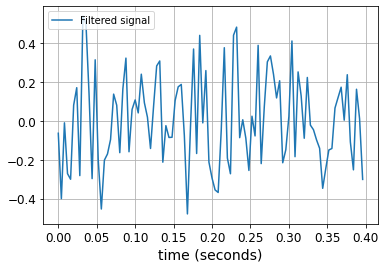

In [53]:

fs = 250.0
lowcut = 5.0
highcut = 15.0
f0 = 10.0
T = 0.4
nsamples = int(T * fs)
t = np.linspace(0, T, nsamples, endpoint=False)

plt.figure(2)
plt.clf()

plt.plot(t, y, label='Filtered signal')
plt.xlabel('time (seconds)')
#plt.hlines([-a, a], 0, T, linestyles='--')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.show()

In [7]:
#takes like 3 minutes to run
cwt_data_eyes_open = []
cwt_labels_eyes_open = []
widths = np.linspace(1.0, 15.0, 100);

for period_group in channels_grouped_100_eyes_open:
    #remove tuple ranking
    period_group_cleaned = [item[1] for item in period_group]
    period_channel_groups = pd.DataFrame([])
    
    #make a master df of all channels for this period
    for channel_group in period_group_cleaned:
        channel_group_df = pd.DataFrame(channel_group)
        period_channel_groups = period_channel_groups.append(channel_group_df)
    
    #group df by channel, each having 100 measures
    channels = period_channel_groups.groupby(['Channel'])
        
    all_channels_cwt_flattened = []
        
    #cwt 100 measures and flatten result to 10000 measures
    for name, channel in channels:
        flattened_volts = []
        for row in channel.iterrows():
            flattened_volts.append(row[1]['Filtered Volts'])
            
        npsig = np.fromiter(flattened_volts, float)
        row_cwt = signal.cwt(npsig, signal.ricker, widths)
        row_cwt_flattened = row_cwt.flatten()
        
        all_channels_cwt_flattened = all_channels_cwt_flattened + list(row_cwt_flattened)
        
    cwt_labels_eyes_open.append(name)
    cwt_data_eyes_open.append(all_channels_cwt_flattened)

cwt_data_eyes_closed = []
cwt_labels_eyes_closed = []
widths = np.linspace(1.0, 15.0, 100);

for period_group in channels_grouped_100_eyes_closed:
    #remove tuple ranking
    period_group_cleaned = [item[1] for item in period_group]
    period_channel_groups = pd.DataFrame([])
    
    #make a master df of all channels for this period
    for channel_group in period_group_cleaned:
        channel_group_df = pd.DataFrame(channel_group)
        period_channel_groups = period_channel_groups.append(channel_group_df)
    
    #group df by channel, each having 100 measures
    channels = period_channel_groups.groupby(['Channel'])
        
    all_channels_cwt_flattened = []
        
    #cwt 100 measures and flatten result to 10000 measures
    for name, channel in channels:
        flattened_volts = []
        for row in channel.iterrows():
            flattened_volts.append(row[1]['Filtered Volts'])
            
        npsig = np.fromiter(flattened_volts, float)
        row_cwt = signal.cwt(npsig, signal.ricker, widths)
        row_cwt_flattened = row_cwt.flatten()
        
        all_channels_cwt_flattened = all_channels_cwt_flattened + list(row_cwt_flattened)
        
    cwt_labels_eyes_closed.append(name)
    cwt_data_eyes_closed.append(all_channels_cwt_flattened)

In [8]:
pd.DataFrame(cwt_data_eyes_closed)

,0,1,2,3,4,5,6,7,8,9,...,79990,79991,79992,79993,79994,79995,79996,79997,79998,79999
0,0.098089,-0.665484,-0.855466,0.233281,0.841410,-0.145305,0.324471,0.044941,-0.788308,-0.009132,...,0.857238,0.812935,0.766617,0.716741,0.652332,0.584125,0.525836,0.454858,0.387113,0.320955
1,-0.640841,-0.851120,0.836132,0.909289,-0.708875,-0.604892,0.548672,-0.100365,0.426089,0.450385,...,-0.060298,-0.102047,-0.137285,-0.170291,-0.203531,-0.225398,-0.246302,-0.255204,-0.267841,-0.277452
2,-0.387981,0.197286,0.222526,-0.840262,0.389340,0.455967,-0.907536,-0.806905,0.888620,1.185515,...,0.165553,0.118833,0.068197,0.027437,-0.019753,-0.064917,-0.106254,-0.140936,-0.182271,-0.213950
3,0.160672,-0.448029,-0.460454,-0.510547,-0.429091,0.955629,0.519610,-1.113280,-0.056927,0.777559,...,-0.112449,-0.139661,-0.173174,-0.198578,-0.216079,-0.233608,-0.237729,-0.249329,-0.247610,-0.241206
4,0.044823,-0.094332,0.238719,-0.149327,-0.313218,-0.560438,-0.481840,0.800017,0.500542,0.150741,...,0.033031,0.056872,0.071315,0.078491,0.087793,0.104214,0.116634,0.117225,0.116831,0.124274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,-0.287058,-1.100606,0.181477,0.508768,0.477443,0.160749,-0.957647,0.171930,0.745499,-0.426652,...,0.083827,0.189430,0.281761,0.365574,0.450527,0.519266,0.581753,0.629583,0.658348,0.677167
445,-0.291803,0.128801,0.097522,-0.402724,-0.051183,0.070685,0.198109,0.241279,0.306633,1.004596,...,-0.282596,-0.275967,-0.261652,-0.242190,-0.225384,-0.210052,-0.189078,-0.172902,-0.159168,-0.139373
446,0.530458,-0.349758,-0.394360,0.986398,0.702186,-0.317544,-1.106216,0.160616,0.434708,-0.375328,...,-0.653978,-0.664659,-0.669179,-0.664881,-0.645584,-0.620264,-0.593980,-0.562737,-0.518421,-0.465302
447,0.545390,-0.417190,-1.164368,0.433951,0.897063,0.475614,-0.599550,-0.535182,0.297309,0.663310,...,0.595947,0.547875,0.488378,0.433809,0.372194,0.310932,0.257229,0.198401,0.140430,0.084311


Saving figure some_cwt_plot


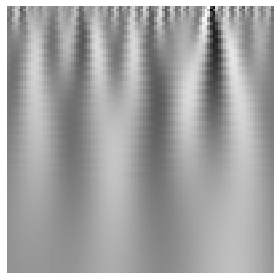

In [9]:
some_cwt = pd.DataFrame(cwt_data_eyes_open[198][70000:80000])
some_cwt_image = some_cwt.values.reshape(100, 100)
plt.imshow(some_cwt_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

save_fig("some_cwt_plot")
plt.show()

In [10]:
eyes_open_labels = []
eyes_closed_labels = []

for cwt_row in cwt_data_eyes_open:
    eyes_open_labels.append(False)
for cwt_row in cwt_data_eyes_closed:
    eyes_closed_labels.append(True)
    
eyes_open_labels = pd.DataFrame(eyes_open_labels)
eyes_closed_labels = pd.DataFrame(eyes_closed_labels)
eyes_open_labels

,0
0,False
1,False
2,False
3,False
4,False
...,...
538,False
539,False
540,False
541,False


In [11]:
cwt_data_eyes_open_df = pd.DataFrame(cwt_data_eyes_open)
cwt_data_eyes_closed_df = pd.DataFrame(cwt_data_eyes_closed)

mock_data = pd.concat([cwt_data_eyes_open_df, cwt_data_eyes_closed_df])
mock_data_labels = pd.concat([eyes_open_labels, eyes_closed_labels])

mock_data

,0,1,2,3,4,5,6,7,8,9,...,79990,79991,79992,79993,79994,79995,79996,79997,79998,79999
0,0.085221,-0.038066,0.006087,0.145304,-0.094290,0.055154,0.150349,0.082426,0.012728,-0.289756,...,0.060655,0.058924,0.058653,0.057500,0.054549,0.055491,0.053926,0.051774,0.049823,0.046644
1,-0.193535,-0.176749,0.108064,-0.032520,-0.070432,0.034455,0.244381,-0.127358,-0.119768,0.189813,...,-0.085352,-0.108056,-0.126503,-0.143326,-0.156092,-0.165475,-0.171556,-0.174468,-0.175815,-0.177406
2,0.112111,-0.202256,-0.059326,0.077942,-0.299934,-0.035288,0.285310,-0.318237,-0.120383,0.662469,...,-0.394791,-0.402149,-0.408538,-0.409518,-0.400687,-0.385208,-0.369090,-0.342831,-0.320376,-0.287502
3,0.033920,-0.077372,-0.166600,-0.285684,0.095441,0.213505,-0.042969,0.107651,0.181344,-0.031755,...,-0.296595,-0.295658,-0.285804,-0.275519,-0.265517,-0.250033,-0.228831,-0.208954,-0.182544,-0.157084
4,0.006316,0.040965,0.063572,-0.035261,-0.075673,0.164162,0.036210,-0.096425,-0.093774,0.314160,...,-0.247854,-0.269916,-0.286228,-0.298299,-0.306520,-0.303903,-0.299474,-0.295040,-0.281631,-0.269451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,-0.287058,-1.100606,0.181477,0.508768,0.477443,0.160749,-0.957647,0.171930,0.745499,-0.426652,...,0.083827,0.189430,0.281761,0.365574,0.450527,0.519266,0.581753,0.629583,0.658348,0.677167
445,-0.291803,0.128801,0.097522,-0.402724,-0.051183,0.070685,0.198109,0.241279,0.306633,1.004596,...,-0.282596,-0.275967,-0.261652,-0.242190,-0.225384,-0.210052,-0.189078,-0.172902,-0.159168,-0.139373
446,0.530458,-0.349758,-0.394360,0.986398,0.702186,-0.317544,-1.106216,0.160616,0.434708,-0.375328,...,-0.653978,-0.664659,-0.669179,-0.664881,-0.645584,-0.620264,-0.593980,-0.562737,-0.518421,-0.465302
447,0.545390,-0.417190,-1.164368,0.433951,0.897063,0.475614,-0.599550,-0.535182,0.297309,0.663310,...,0.595947,0.547875,0.488378,0.433809,0.372194,0.310932,0.257229,0.198401,0.140430,0.084311


In [12]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(mock_data, test_size=0.2, random_state=42)
train_set_labels, test_set_labels = train_test_split(mock_data_labels, test_size=0.2, random_state=42)

train_set_labels_eyes_closed = (train_set_labels.values.ravel() == True)
test_set_labels_eyes_closed = (test_set_labels.values.ravel() == True)

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=52)

forest_clf.fit(train_set, train_set_labels_eyes_closed)

RandomForestClassifier(random_state=52)

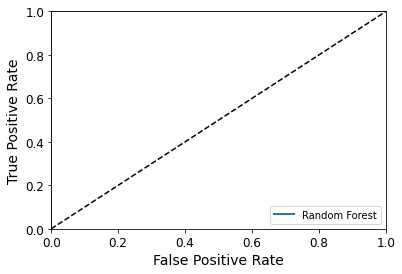

In [13]:
from sklearn.model_selection import cross_val_predict

y_probas_forest = cross_val_predict(forest_clf, train_set, train_set_labels_eyes_closed, cv=3,
                                    method="predict_proba")

from sklearn.metrics import roc_curve
y_scores_forest = y_probas_forest[:, 1]   # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(train_set_labels_eyes_closed,y_scores_forest)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [14]:
from sklearn.metrics import roc_auc_score
roc_auc_score(train_set_labels_eyes_closed, y_scores_forest)

1.0

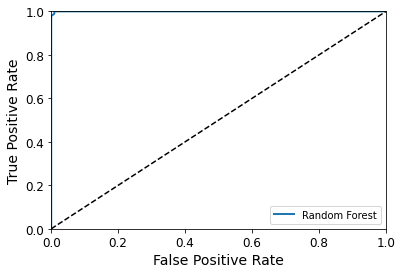

In [15]:
y_probas_forest_test = cross_val_predict(forest_clf, test_set, test_set_labels_eyes_closed, cv=3,
                                    method="predict_proba")

y_scores_forest_test = y_probas_forest_test[:, 1]   # score = proba of positive class
fpr_forest_test2, tpr_forest_test2, thresholds_forest_test2 = roc_curve(test_set_labels_eyes_closed,y_scores_forest_test)

plot_roc_curve(fpr_forest_test2, tpr_forest_test2, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [16]:
roc_auc_score(test_set_labels_eyes_closed, y_scores_forest_test)

0.9998476229175133

In [17]:
import joblib

joblib.dump(forest_clf, "mock_eyes_closed_detector.pkl")

['mock_eyes_closed_detector.pkl']